# ASL CNN Classification Capstone Project

## Import our libraries

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(2)
import os
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Load our data

In [2]:
train_set = './dataset/asl_alphabet_train/'
test_set  = './dataset/asl_alphabet_test/' 

## Function to read our images to plot

In [3]:
def load_unique():
    size_img   = 64,64 
    plot_img   = []
    plot_label = []
    for folder in os.listdir(train_set):
        for file in os.listdir(train_set + '/' + folder):
            filepath = train_set + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            plot_img.append(final_img)
            plot_label.append(folder)
            break
    return plot_img, plot_label

plot_img, plot_label = load_unique()
print("directory_labels = ", plot_label)

# Credit for similar preprocessing code to Rohit Modi

directory_labels =  ['R', 'U', 'I', 'N', 'G', 'Z', 'T', 'S', 'A', 'F', 'O', 'H', 'del', 'nothing', 'space', 'M', 'J', 'C', 'D', 'V', 'Q', 'X', 'E', 'B', 'K', 'L', 'Y', 'P', 'W']


## Function to plot our images from above function

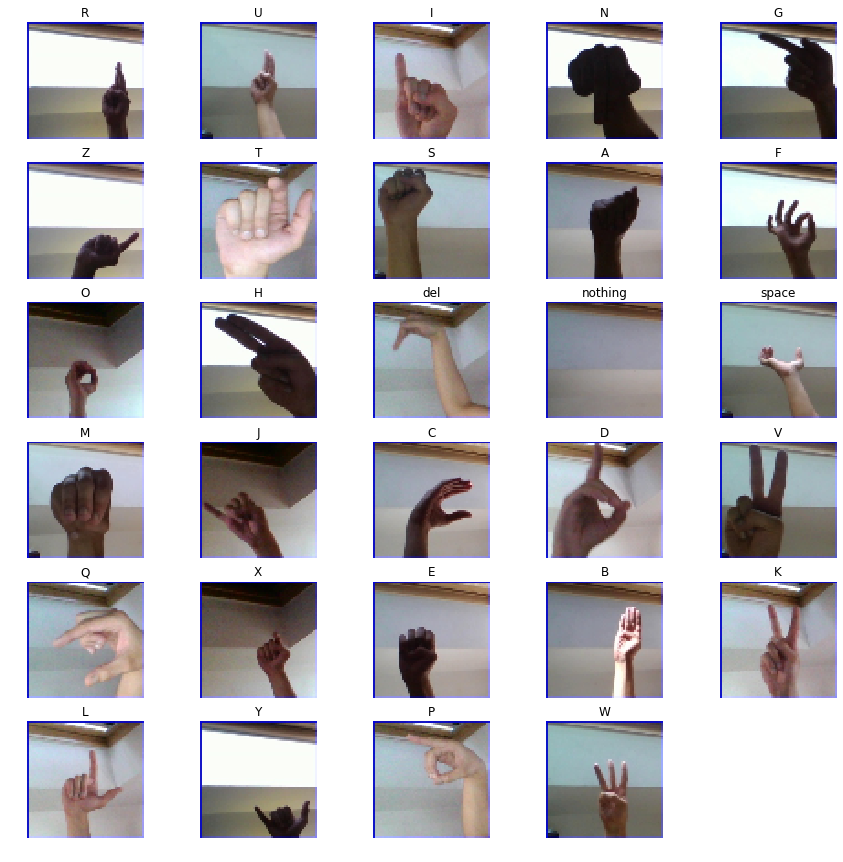

In [4]:
fig = plt.figure(figsize = (15,15))

def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 6
col = 5
for i in range(1,(row*col)):
    plot_images(fig, plot_img[image_index], plot_label[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

# Credit for similar style coding Ayush Thakur

## Function to load our data into specific classes for our train/test split

In [5]:
label_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,
              'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,
              'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,
              'V':21,'W':22,'X':23,'Y':24,'Z':25,
              'space':26,'del':27,'nothing':28}

def load_data():
    images = []
    labels = []
    size   = 64,64
    print("LOADING DATA: ",end = "")
    for folder in os.listdir(train_set):
        print(folder, end = ' | ')
        for image in os.listdir(train_set + "/" + folder):
            temp_img = cv2.imread(train_set + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            if folder == 'A':
                labels.append(label_dict['A'])
            elif folder == 'B':
                labels.append(label_dict['B'])
            elif folder == 'C':
                labels.append(label_dict['C'])
            elif folder == 'D':
                labels.append(label_dict['D'])
            elif folder == 'E':
                labels.append(label_dict['E'])
            elif folder == 'F':
                labels.append(label_dict['F'])
            elif folder == 'G':
                labels.append(label_dict['G'])
            elif folder == 'H':
                labels.append(label_dict['H'])
            elif folder == 'I':
                labels.append(label_dict['I'])
            elif folder == 'J':
                labels.append(label_dict['J'])
            elif folder == 'K':
                labels.append(label_dict['K'])
            elif folder == 'L':
                labels.append(label_dict['L'])
            elif folder == 'M':
                labels.append(label_dict['M'])
            elif folder == 'N':
                labels.append(label_dict['N'])
            elif folder == 'O':
                labels.append(label_dict['O'])
            elif folder == 'P':
                labels.append(label_dict['P'])
            elif folder == 'Q':
                labels.append(label_dict['Q'])
            elif folder == 'R':
                labels.append(label_dict['R'])
            elif folder == 'S':
                labels.append(label_dict['S'])
            elif folder == 'T':
                labels.append(label_dict['T'])
            elif folder == 'U':
                labels.append(label_dict['U'])
            elif folder == 'V':
                labels.append(label_dict['V'])
            elif folder == 'W':
                labels.append(label_dict['W'])
            elif folder == 'X':
                labels.append(label_dict['X'])
            elif folder == 'Y':
                labels.append(label_dict['Y'])
            elif folder == 'Z':
                labels.append(label_dict['Z'])
            elif folder == 'space':
                labels.append(label_dict['space'])
            elif folder == 'del':
                labels.append(label_dict['del'])
            elif folder == 'nothing':
                labels.append(label_dict['nothing'])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.1)
    
    print()
    print('Total of', len(X_train),'images for training','--','Train data shape =',X_train.shape)
    print('Total of', len(X_test),'images for testing','--','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test

# Credit for similar style Deepal Dsilva from Rohit Modi

## Using the function to put data into our train/test split variables

In [6]:
X_train, X_test, Y_train, Y_test = load_data()

LOADING DATA: R | U | I | N | G | Z | T | S | A | F | O | H | del | nothing | space | M | J | C | D | V | Q | X | E | B | K | L | Y | P | W | 
Total of 78300 images for training -- Train data shape = (78300, 64, 64, 3)
Total of 8700 images for testing -- Test data shape = (8700, 64, 64, 3)


## Function for our modeling

In [7]:
def build_model():
    
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = 3, padding = 'same', strides = 2, activation = 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(32, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = 3, padding = 'same', strides = 2, activation = 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(128, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = 3, padding = 'same', strides = 2 , activation = 'relu'))
    model.add(MaxPool2D(3))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(29, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', 
                  loss      = 'categorical_crossentropy', 
                  metrics   = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

# Credit for similar style Deepal Dsilva from Rohit Modi

## Model summary and layers

In [8]:
model = build_model()

MODEL CREATED
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856  

## Function to fit our model

In [9]:
def fit_model():
    history = model.fit(X_train, 
                        Y_train, 
                        batch_size       = 64, 
                        epochs           = 5, 
                        validation_split = 0.1)
    return history

In [10]:
# def fit_model2():
#     history = model.fit(X_train, 
#                         Y_train, 
#                         batch_size       = 128, 
#                         epochs           = 5, 
#                         validation_split = 0.1)
#     return history

In [11]:
# def fit_model3():
#     history = model.fit(X_train, 
#                         Y_train, 
#                         batch_size       = 256, 
#                         epochs           = 5, 
#                         validation_split = 0.1)
#     return history

## Running our model and inserting into a variable

In [12]:
model_history = fit_model()

Train on 70470 samples, validate on 7830 samples
Epoch 1/5
70470/70470 [==============================] - 1797s 26ms/step - loss: 2.3005 - acc: 0.3232 - val_loss: 1.0053 - val_acc: 0.6642
Epoch 2/5
70470/70470 [==============================] - 1538s 22ms/step - loss: 0.8885 - acc: 0.7025 - val_loss: 0.8464 - val_acc: 0.7096
Epoch 3/5
70470/70470 [==============================] - 1575s 22ms/step - loss: 0.4176 - acc: 0.8551 - val_loss: 0.1507 - val_acc: 0.9527
Epoch 4/5
70470/70470 [==============================] - 1600s 23ms/step - loss: 0.2758 - acc: 0.9040 - val_loss: 0.0766 - val_acc: 0.9784
Epoch 5/5
70470/70470 [==============================] - 1568s 22ms/step - loss: 0.2072 - acc: 0.9273 - val_loss: 0.0762 - val_acc: 0.9784


In [13]:
# model_history2 = fit_model2()

In [14]:
# model_history3 = fit_model3()

## Comparing and checking our accuracy and validation accuracy scores between different batch sizes

In [15]:
print('Final Accuracy: {:.2f}%'.format(model_history.history['acc'][4] * 100))
print('Validation Set Accuracy: {:.2f}%'.format(model_history.history['val_acc'][4] * 100))
# print()
# print('Model 1 with batch of 128')
# print('Final Accuracy: {:.2f}%'.format(model_history2.history['acc'][4] * 100))
# print('Validation Set Accuracy: {:.2f}%'.format(model_history2.history['val_acc'][4] * 100))
# print()
# print('Model 1 with batch of 64')
# print('Final Accuracy: {:.2f}%'.format(model_history3.history['acc'][4] * 100))
# print('Validation Set Accuracy: {:.2f}%'.format(model_history3.history['val_acc'][4] * 100))


Final Accuracy: 92.73%
Validation Set Accuracy: 97.84%


## Plotting our epochs with both loss and accuracy scores

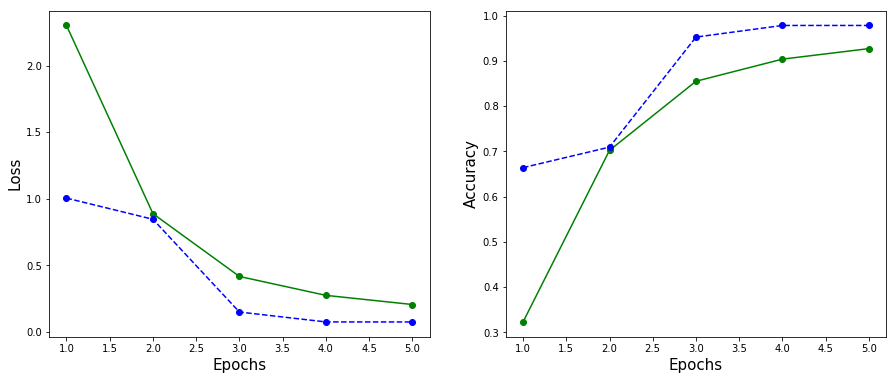

In [34]:
hist = model.history
epochs = range(1, len(hist.history['loss']) + 1)

plt.subplots(figsize=(15,6))
plt.subplot(121)
plt.plot(epochs, hist.history['loss'], 'go-')
plt.plot(epochs, hist.history['val_loss'], 'bo--')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(122)
plt.plot(epochs, hist.history['acc'], 'go-')
plt.plot(epochs, hist.history['val_acc'], 'bo--')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# credit to Harish Fegade for similar style

In [17]:
# hist2 = model.history2
# epochs = range(1, len(hist.history['loss']) + 1)

# plt.subplots(figsize=(15,6))
# plt.subplot(121)
# plt.plot(epochs, hist.history['loss'], 'bo-', 'g')
# plt.plot(epochs, hist.history['val_loss'], 'ro--', 'p')
# plt.title('Model 2')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

# plt.subplot(122)
# plt.plot(epochs, hist.history['acc'], 'bo-', 'r')
# plt.plot(epochs, hist.history['val_acc'], 'ro--', 'b')
# plt.title('Model 2')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

# plt.show()

In [18]:
# hist3 = model.history3
# epochs = range(1, len(hist.history['loss']) + 1)

# plt.subplots(figsize=(15,6))
# plt.subplot(121)
# plt.plot(epochs, hist.history['loss'], 'bo-', 'g')
# plt.plot(epochs, hist.history['val_loss'], 'ro--', 'p')
# plt.title('Model 3')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

# plt.subplot(122)
# plt.plot(epochs, hist.history['acc'], 'bo-', 'r')
# plt.plot(epochs, hist.history['val_acc'], 'ro--', 'b')
# plt.title('Model 3')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

# plt.show()

In [35]:
score = model.evaluate(x=X_test, y=Y_test, verbose=0)
print('Test Accuracy:', score[1])

Test Accuracy: 0.9804597701697514


In [40]:
print('Final Accuracy: {:.2f}%'.format(model_history.history['acc'][4] * 100))
print('Validation Set Accuracy: {:.2f}%'.format(model_history.history['val_acc'][4] * 100))
print('Test Accuracy: {:.2f}%'.format(score[1] * 100))

Final Accuracy: 92.73%
Validation Set Accuracy: 97.84%
Test Accuracy: 98.05%


In [43]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("Evaluation Accuracy = {:.2f}%".format(evaluate_metrics[1] * 100))
print("Evaluation Loss = {:.2f}%".format(evaluate_metrics[0] * 100))

8700/8700 [==============================] - 51s 6ms/step
Evaluation Accuracy = 98.05%
Evaluation Loss = 7.28%


In [23]:
test_img = []
test_label = []
size = 64,64
for file in os.listdir(test_set):
    temp_img = cv2.imread(test_set + '/' + file)
    temp_img = cv2.resize(temp_img, size)
    test_img.append(temp_img)
test_img = np.array(test_img)
test_img = test_img.astype('float32')/255.0

In [24]:
test_res = model.predict(test_img)